In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
#Importing dataset from keras
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

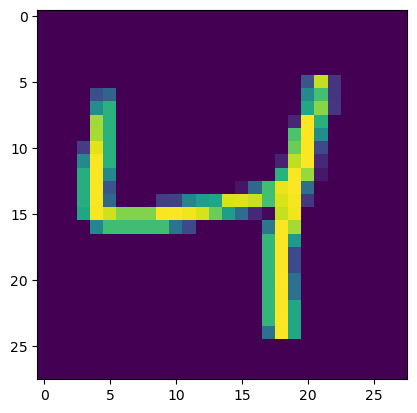

In [5]:
plt.imshow(X_train_full[2])

In [6]:
#Normalisation of data
X_train_full = X_train_full.reshape((X_train_full.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0


In [7]:
#Initialising accuracy, confusion matrix list to append values in the same
accuracy_list = []
confusion_matrix_list = []

hidden_layer_neurons = [10, 20, 30, 40, 50]

In [8]:
#Hidden layer activation function Relu
for neurons in hidden_layer_neurons:
    for i in range(10):
        # create a new instance of the model for each iteration
        model = Sequential()
        model.add(Dense(100-neurons, activation='relu', input_dim=X_train_full.shape[1]))
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit and evaluate the model as before
        X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=i)
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2,verbose = 0)
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = np.mean(y_pred == y_test)
        accuracy_list.append(accuracy)
        confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

    print(f"Results for {neurons} neurons in hidden layer 2:")
    print("Average Accuracy: ", np.mean(accuracy_list))
    print("Average Confusion Matrix: ")
    print(np.mean(confusion_matrix_list, axis=0))


375/375 [==============================] - 1s 3ms/step
Results for 10 neurons in hidden layer 2:
Average Accuracy:  0.9677083333333334
Average Confusion Matrix: 
[[1.1565e+03 7.0000e-01 2.0000e+00 1.2000e+00 1.3000e+00 3.4000e+00
  3.3000e+00 1.0000e+00 4.0000e+00 2.2000e+00]
 [0.0000e+00 1.3493e+03 6.7000e+00 2.1000e+00 2.1000e+00 2.0000e-01
  1.1000e+00 2.2000e+00 5.4000e+00 1.4000e+00]
 [4.5000e+00 4.0000e+00 1.1453e+03 6.2000e+00 4.3000e+00 9.0000e-01
  1.3000e+00 6.0000e+00 6.2000e+00 1.6000e+00]
 [1.7000e+00 2.0000e+00 1.2100e+01 1.1787e+03 1.0000e-01 1.6100e+01
  5.0000e-01 7.0000e+00 9.2000e+00 6.7000e+00]
 [8.0000e-01 2.3000e+00 3.4000e+00 2.0000e-01 1.1300e+03 5.0000e-01
  4.2000e+00 4.4000e+00 2.4000e+00 1.9500e+01]
 [3.2000e+00 1.4000e+00 2.1000e+00 1.1700e+01 1.6000e+00 1.0431e+03
  5.7000e+00 1.3000e+00 9.8000e+00 4.9000e+00]
 [8.2000e+00 1.6000e+00 2.7000e+00 4.0000e-01 4.5000e+00 9.3000e+00
  1.1472e+03 4.0000e-01 4.4000e+00 1.0000e-01]
 [1.7000e+00 4.1000e+00 7.4000e+0

375/375 [==============================] - 0s 764us/step
Results for 50 neurons in hidden layer 2:
Average Accuracy:  0.96776
Average Confusion Matrix: 
[[1.15294e+03 3.00000e-01 3.14000e+00 1.44000e+00 1.30000e+00 3.32000e+00
  4.80000e+00 1.02000e+00 4.90000e+00 2.44000e+00]
 [1.80000e-01 1.34830e+03 6.06000e+00 2.80000e+00 2.22000e+00 3.80000e-01
  1.58000e+00 2.60000e+00 4.94000e+00 1.44000e+00]
 [3.72000e+00 3.38000e+00 1.14372e+03 8.30000e+00 3.98000e+00 8.60000e-01
  2.02000e+00 6.00000e+00 6.32000e+00 2.00000e+00]
 [1.10000e+00 1.84000e+00 1.32000e+01 1.18068e+03 3.20000e-01 1.61000e+01
  2.60000e-01 5.12000e+00 9.78000e+00 5.70000e+00]
 [9.40000e-01 2.20000e+00 4.28000e+00 4.80000e-01 1.12938e+03 9.20000e-01
  4.62000e+00 4.08000e+00 2.38000e+00 1.84200e+01]
 [2.34000e+00 1.04000e+00 1.64000e+00 1.27600e+01 2.24000e+00 1.04276e+03
  7.18000e+00 1.14000e+00 8.90000e+00 4.80000e+00]
 [6.08000e+00 1.42000e+00 2.30000e+00 5.60000e-01 3.50000e+00 7.12000e+00
  1.15266e+03 2.80000e-

In [9]:
#Hidden layer activation function : Sigmoid
for neurons in hidden_layer_neurons:
    for i in range(10):
        # create a new instance of the model for each iteration
        model = Sequential()
        model.add(Dense(100-neurons, activation='sigmoid', input_dim=X_train_full.shape[1]))
        model.add(Dense(neurons, activation='sigmoid'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit and evaluate the model as before
        X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=i)
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2,verbose = 0)
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = np.mean(y_pred == y_test)
        accuracy_list.append(accuracy)
        confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

    print(f"Results for {neurons} neurons in hidden layer 2:")
    print("Average Accuracy: ", np.mean(accuracy_list))
    print("Average Confusion Matrix: ")
    print(np.mean(confusion_matrix_list, axis=0))


375/375 [==============================] - 0s 853us/step
Results for 10 neurons in hidden layer 2:
Average Accuracy:  0.9672944444444445
Average Confusion Matrix: 
[[1.15275000e+03 3.00000000e-01 3.05000000e+00 1.45000000e+00
  1.26666667e+00 3.33333333e+00 5.05000000e+00 1.01666667e+00
  5.01666667e+00 2.36666667e+00]
 [1.83333333e-01 1.34788333e+03 6.15000000e+00 2.86666667e+00
  2.13333333e+00 4.00000000e-01 1.68333333e+00 2.70000000e+00
  4.96666667e+00 1.53333333e+00]
 [3.88333333e+00 3.35000000e+00 1.14325000e+03 8.25000000e+00
  3.98333333e+00 1.00000000e+00 2.31666667e+00 5.85000000e+00
  6.48333333e+00 1.93333333e+00]
 [1.15000000e+00 2.13333333e+00 1.32500000e+01 1.17955000e+03
  3.66666667e-01 1.60166667e+01 4.16666667e-01 5.38333333e+00
  1.01833333e+01 5.65000000e+00]
 [9.00000000e-01 2.13333333e+00 4.28333333e+00 4.83333333e-01
  1.12918333e+03 1.06666667e+00 5.01666667e+00 3.96666667e+00
  2.33333333e+00 1.83333333e+01]
 [2.60000000e+00 1.11666667e+00 1.71666667e+00 1.30

375/375 [==============================] - 0s 909us/step
Results for 50 neurons in hidden layer 2:
Average Accuracy:  0.9667116666666667
Average Confusion Matrix: 
[[1.15309e+03 2.30000e-01 2.76000e+00 1.55000e+00 1.43000e+00 3.18000e+00
  5.22000e+00 1.03000e+00 5.05000e+00 2.06000e+00]
 [2.10000e-01 1.34662e+03 6.44000e+00 3.06000e+00 2.17000e+00 5.80000e-01
  1.63000e+00 2.89000e+00 5.30000e+00 1.60000e+00]
 [4.12000e+00 3.23000e+00 1.14199e+03 8.11000e+00 4.35000e+00 1.15000e+00
  2.73000e+00 6.24000e+00 6.56000e+00 1.82000e+00]
 [1.47000e+00 2.43000e+00 1.32500e+01 1.17779e+03 5.00000e-01 1.60600e+01
  4.20000e-01 6.31000e+00 9.99000e+00 5.88000e+00]
 [1.01000e+00 2.00000e+00 4.46000e+00 4.00000e-01 1.12915e+03 1.00000e+00
  5.19000e+00 3.75000e+00 2.13000e+00 1.86100e+01]
 [3.34000e+00 1.15000e+00 2.00000e+00 1.32900e+01 3.02000e+00 1.03944e+03
  7.75000e+00 1.18000e+00 8.74000e+00 4.89000e+00]
 [6.52000e+00 1.27000e+00 2.24000e+00 3.40000e-01 4.29000e+00 6.81000e+00
  1.15248e+0

In [10]:
#Hidden layer activation function : tanh
for neurons in hidden_layer_neurons:
    for i in range(10):
        # create a new instance of the model for each iteration
        model = Sequential()
        model.add(Dense(100-neurons, activation='tanh', input_dim=X_train_full.shape[1]))
        model.add(Dense(neurons, activation='tanh'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit and evaluate the model as before
        X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=i)
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2,verbose = 0)
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = np.mean(y_pred == y_test)
        accuracy_list.append(accuracy)
        confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

    print(f"Results for {neurons} neurons in hidden layer 2:")
    print("Average Accuracy: ", np.mean(accuracy_list))
    print("Average Confusion Matrix: ")
    print(np.mean(confusion_matrix_list, axis=0))


375/375 [==============================] - 0s 875us/step
Results for 10 neurons in hidden layer 2:
Average Accuracy:  0.9668946969696971
Average Confusion Matrix: 
[[1.15325455e+03 2.63636364e-01 2.80909091e+00 1.54545455e+00
  1.43636364e+00 3.11818182e+00 5.12727273e+00 9.90909091e-01
  5.02727273e+00 2.02727273e+00]
 [2.00000000e-01 1.34660000e+03 6.41818182e+00 3.13636364e+00
  2.20000000e+00 5.63636364e-01 1.60000000e+00 2.88181818e+00
  5.27272727e+00 1.62727273e+00]
 [4.10909091e+00 3.19090909e+00 1.14213636e+03 8.17272727e+00
  4.30909091e+00 1.12727273e+00 2.70000000e+00 6.17272727e+00
  6.54545455e+00 1.83636364e+00]
 [1.46363636e+00 2.35454545e+00 1.31090909e+01 1.17808182e+03
  5.18181818e-01 1.59000000e+01 4.45454545e-01 6.37272727e+00
  9.95454545e+00 5.90000000e+00]
 [1.00909091e+00 1.92727273e+00 4.42727273e+00 4.18181818e-01
  1.12957273e+03 9.90909091e-01 5.08181818e+00 3.77272727e+00
  2.15454545e+00 1.83454545e+01]
 [3.31818182e+00 1.10909091e+00 1.90909091e+00 1.33

375/375 [==============================] - 0s 970us/step
Results for 50 neurons in hidden layer 2:
Average Accuracy:  0.9668427777777776
Average Confusion Matrix: 
[[1.15295333e+03 2.53333333e-01 2.89333333e+00 1.57333333e+00
  1.38666667e+00 3.15333333e+00 5.40666667e+00 8.80000000e-01
  5.03333333e+00 2.06666667e+00]
 [2.26666667e-01 1.34684000e+03 6.30000000e+00 3.03333333e+00
  2.16000000e+00 5.93333333e-01 1.56000000e+00 2.78000000e+00
  5.40000000e+00 1.60666667e+00]
 [4.00666667e+00 3.23333333e+00 1.14248667e+03 7.86666667e+00
  4.33333333e+00 1.16666667e+00 2.79333333e+00 6.03333333e+00
  6.53333333e+00 1.84666667e+00]
 [1.44000000e+00 2.18000000e+00 1.31066667e+01 1.17782000e+03
  5.46666667e-01 1.60066667e+01 5.00000000e-01 6.32000000e+00
  1.01600000e+01 6.02000000e+00]
 [9.26666667e-01 1.91333333e+00 4.42666667e+00 4.40000000e-01
  1.12980667e+03 1.08000000e+00 5.18000000e+00 3.74666667e+00
  2.08666667e+00 1.80933333e+01]
 [3.30666667e+00 1.09333333e+00 1.78000000e+00 1.35